In [7]:
import os
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.linear_model import LinearRegression as lr
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
os.chdir('C:\\Users\\VanBuren\\Desktop\\Coursework\\Capstone\\Coding_analysis\\Test_Data')

In [2]:
dfsub = pd.read_csv('Masterlist.csv',header = 0,parse_dates = ['Date_Time_NYC'])


# Fields: [Date_Time_NYC, Temp, Humidity_%, PM2.5, PM2.5_calib, PA_part, Temtop, Neph, Location,
#         Train_Line, Train_num, Loc_code, Initials]

#3/16 THOUGHT: USE CALMASTER A BIT MORE FOR THE LARGE-SCALE ANALYSES.
# master lists:
calmaster = dfsub[['PM2.5_calib','Loc_code']]
calmaster = calmaster.loc[calmaster['PM2.5_calib'].notnull()]

rawmaster = dfsub[['PM2.5','Loc_code']]
rawmaster = rawmaster.loc[rawmaster['PM2.5'].notnull()]


# segregate by loc code and raw/calibrated
outcal = calmaster['PM2.5_calib'].loc[calmaster['Loc_code'] == 'O']
outraw = rawmaster['PM2.5'].loc[rawmaster['Loc_code'] == 'O']

tcarcal = calmaster['PM2.5_calib'].loc[calmaster['Loc_code'] == 'T']
tcarraw = rawmaster['PM2.5'].loc[rawmaster['Loc_code'] == 'T']

platcal = calmaster['PM2.5_calib'].loc[calmaster['Loc_code'] == 'PU']
platraw = rawmaster['PM2.5'].loc[rawmaster['Loc_code'] == 'PU']

outplatcal = calmaster['PM2.5_calib'].loc[calmaster['Loc_code'] == 'PA']
outplatraw = rawmaster['PM2.5'].loc[rawmaster['Loc_code'] == 'PA']

#means
outair = np.mean(outcal)
tcarair = np.mean(tcarcal)
platair = np.mean(platcal)
outplatair = np.mean(outplatcal)

outrawair = np.mean(outraw)
tcarrawair = np.mean(tcarraw)
platrawair = np.mean(platraw)
outplatrawair = np.mean(outplatraw)

#stdev
outstd = np.std(outcal)
tcarstd = np.std(tcarcal)
platstd = np.std(platcal)
outplatstd = np.std(outplatcal)

outrawstd = np.std(outraw)
tcarrawstd = np.std(tcarraw)
platrawstd = np.std(platraw)
outplatrawstd = np.std(outplatraw)

#standard errors
stderr = lambda s: np.std(s)/s.size

outair_err = stderr(outcal)
tcarair_err = stderr(tcarcal)
platair_err = stderr(platcal)
outplatair_err = stderr(outplatcal)

outrawair_err = stderr(outraw)
tcarrawair_err = stderr(tcarraw)
platrawair_err = stderr(platraw)
outplatrawair_err = stderr(outplatraw)


# outraw = np.mean([outraw1,outraw2])
# tcarraw = np.mean([tcarraw1,tcarraw2])
# platraw = np.mean([platraw1,platraw2])
# outplatraw = np.mean([outplatraw2])

In [3]:
locales = ['Outdoors','Aboveground\n Platform','Underground\n Platform','Train Car']

[Text(0,0.5,'PM2.5 Concentration (µg/m^3)'), Text(0.5,1,'Calibrated Data')]

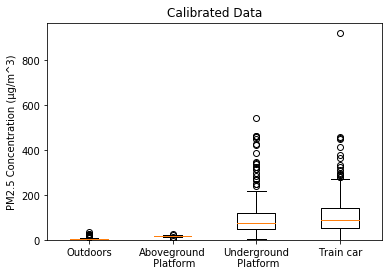

In [4]:
# Boxplot_calibrated

fig, ax = plt.subplots()
cal_box = [outcal,outplatcal,platcal,tcarcal]
ax.boxplot(cal_box, labels = locales)
ax.set_ylim(bottom = 0)
ax.set(Title = 'Calibrated Data', ylabel = 'PM2.5 Concentration (µg/m^3)')

[Text(0,0.5,'PM2.5 Concentration (µg/m^3)'), Text(0.5,1,'Raw Data')]

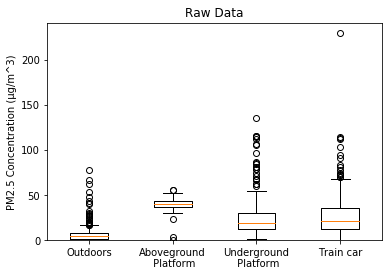

In [107]:
# Boxplot_raw
raw_box = [outraw,outplatraw,platraw,tcarraw]
fig,ax = plt.subplots()
ax.boxplot(raw_box, labels = locales)
ax.set_ylim(bottom = 0)
ax.set(Title = 'Raw Data', ylabel = 'PM2.5 Concentration (µg/m^3)')

[Text(0,0.5,'Avg PM2.5 Concentration (µg/m^3)'), Text(0.5,1,'Raw PA Data')]

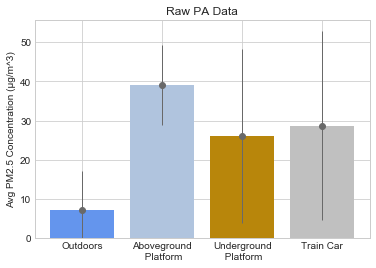

In [8]:
# barplot raw
fig,ax = plt.subplots()
locales = ['Outdoors','Aboveground\n Platform','Underground\n Platform','Train Car']
vals_raw = [outrawair,outplatrawair,platrawair,tcarrawair]
err_raw = [outrawair_err,outplatrawair_err,platrawair_err,tcarrawair_err]
std_raw = [outrawstd,outplatrawstd,platrawstd,tcarrawstd]

vals_cal = [outair,outplatair,platair,tcarair]
err_cal = [outair_err,outplatair_err,platair_err,tcarair_err]
std_cal = [outstd,outplatstd,platstd,tcarstd]

colors = ['cornflowerblue','lightsteelblue','darkgoldenrod','silver']

ax.bar(locales,vals_raw,color = colors)
ax.errorbar(locales, vals_raw, yerr = std_raw, fmt = "o", linewidth = 1, color = 'dimgrey')
ax.set_ylim(bottom = 0)
ax.set(title = 'Raw PA Data', 
       ylabel= 'Avg PM2.5 Concentration (µg/m^3)')

[Text(0,0.5,'Avg PM2.5 Concentration (µg/m^3)'),
 Text(0.5,1,'Calibrated PA Data')]

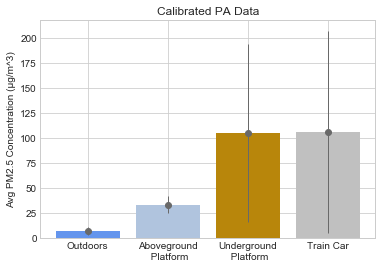

In [29]:
# barplot calibrated
colors = ['cornflowerblue','lightsteelblue','darkgoldenrod','silver']
fig,ax = plt.subplots()
ax.bar(locales,vals_cal,color = colors)
ax.errorbar(locales,vals_cal,yerr = std_cal,fmt = "o", linewidth = 1, color = 'dimgrey')


ax.set(title = 'Calibrated PA Data', 
       ylabel= 'Avg PM2.5 Concentration (µg/m^3)')
# ax.set_ylim(top = 150)

(0.0, 150)

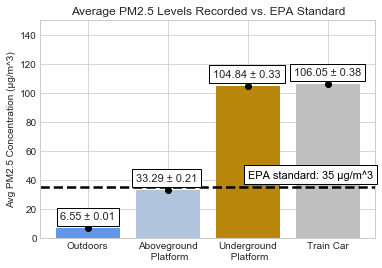

In [28]:
# barplot FIGURES
colors = ['cornflowerblue','lightsteelblue','darkgoldenrod','silver']
fig,ax = plt.subplots()
ax.bar(locales,vals_cal,color = colors)
ax.errorbar(locales,vals_cal,yerr = err_cal,fmt = "o", color = "black")
# ax.set_xticklabels([])
# ax.axhline(12,color='black',linewidth = 2.5, linestyle = 'dashed')
# ax.text(2,18.4,"EPA standard: 12 µg/m^3",bbox=dict(facecolor='white', alpha=1),**dict(size=11,color='black'))

ax.axhline(35,color='black',linewidth = 2.5, linestyle = 'dashed')
ax.text(2,41.4,"EPA standard: 35 µg/m^3",bbox=dict(facecolor='white', alpha=1),**dict(size=11,color='black'))

# ax.axhline(39.4,color = 'red', linewidth = 2.5)
# ax.text(2-.67,45.7,"Exposure after 8 hours: 39.4 µg/m^3",bbox=dict(facecolor='white', alpha=1),**dict(size=11,color='red'))


ax.text(-0.34,vals_cal[0]+6,str(round(vals_cal[0],2))+" ± " + str(round(err_cal[0],2)),
        bbox=dict(facecolor='white', alpha=1),**dict(size=11))
ax.text(1-0.4,vals_cal[1]+6,str(round(vals_cal[1],2))+" ± " + str(round(err_cal[1],2)),
        bbox=dict(facecolor='white', alpha=1),**dict(size=11))
ax.text(2-0.43,vals_cal[2]+6,str(round(vals_cal[2],2))+" ± " + str(round(err_cal[2],2)),
        bbox=dict(facecolor='white', alpha=1),**dict(size=11))
ax.text(3-0.43,vals_cal[3]+6,str(round(vals_cal[3],2))+" ± " + str(round(err_cal[3],2)),
        bbox=dict(facecolor='white', alpha=1),**dict(size=11))
ax.set(title = 'Average PM2.5 Levels Recorded vs. EPA Standard', 
       ylabel= 'Avg PM2.5 Concentration (µg/m^3)')
ax.set_ylim(top = 150)

In [12]:
# Then gotta do boxplots/bargraphs for stations comparison, maybe.

# Might be wise to do something like looping through station names to get means/stdevs into their lists, rather than the
# soup that I locked myself into on the Loc_codes


#This type of presentation runs into the issue that it doesn't register time spent on platform


# TURN THIS INTO A FUNCTION THAT PRODUCES LISTS FOR SPECIFIC TRAIN LINES (AND ISOLATED TO PU CODE)
# MAYBE THREE LAMBDAS, ACTUALLY. EASIER TO PLUG INTO THE GRAPHS EFFICIENTLY

stations = dfsub['Location'].loc[dfsub['Loc_code'].isin(['PU','PA'])].unique()

station_means = {}
for s in stations:
    station_means[s] = np.mean(dfsub['PM2.5_calib'].loc[dfsub['Location'] == s])

station_std = {}
for t in stations:
    station_std[t] = np.std(dfsub['PM2.5_calib'].loc[dfsub['Location'] == t])
dfsub['Location'].loc[dfsub['Loc_code'].isin(['PU','PA'])].value_counts()

116th St - Columbia University         81
Lexington Ave - 63rd St                50
59th St - Columbus Circle (1/2)        20
St. George                             17
96th St (1/2/3)                        13
Jefferson Ave                          12
Outside Curtis HS                      11
96th St (A/B/C) (Downtown)             11
125th St (A/B/C/D)                     10
59th St - Columbus Circle (A/B/C/D)     9
Times Sq - 42nd St                      9
14th St (A/C/E)                         9
Grand Central - 42nd St (7)             8
Inwood - 207th St                       7
Broadway - Lafayette St                 6
Apartment (Chelsea)                     4
168th St                                4
72nd St (Q)                             4
Lower East Side - 2nd Ave               3
86th St (Q)                             3
Broadway Junction (A/C)                 3
Times Sq - 42nd St (1/2/3)              3
Herald Sq - 34th St (N/Q/R/W)           2
W 4th St - Washington Sq (Upper)  

In [40]:
np.sort(dfsub['Location'].unique())

array(['1 train', '103rd St (1)', '116th St (A/B/C)',
       '116th St - Columbia University', '125th St (1)',
       '125th St (A/B/C/D)', '135th St (A/B/C)', '145th St (1)',
       '14th St', '14th St (1/2/3)', '14th St (A/C/E)', '14th St (F/M)',
       '155th St (A/C)', '157th St', '163rd St - Amsterdam Av',
       '168th St', '168th St (A/C)', '175th St', '181st St (A)',
       '18th St (1/2)', '190th St', '1st Ave', '23rd St (1)',
       '23rd St (1/2)', '23rd St (A/C/E)', '28th St (1/2)',
       '34th St - Penn Station', '34th St - Penn Station (1/2/3)',
       '34th St - Penn Station (A/C/E)',
       '34th St.34th St - Penn Station (A/C/E)', '42nd St - Bryant Pk',
       '42nd St - Port Authority Bus Term',
       '47th-50th Sts - Rockefeller Ctr', '49th St', '50th St (1/2)',
       '50th St (A/C/E)', '50th St (D)', '57th St', '57th St-7th Av',
       '59th St - Columbus Circle (1/2)',
       '59th St - Columbus Circle (A/B/C/D)', '5th Ave - 59th St',
       '5th Ave - Bryant Pk

[Text(0,0.5,'No. Samples'),
 Text(0.5,0,'PM2.5 Concentration (µg/m^3)'),
 Text(0.5,1,'PM2.5 Samples for 116th St - Columbia University')]

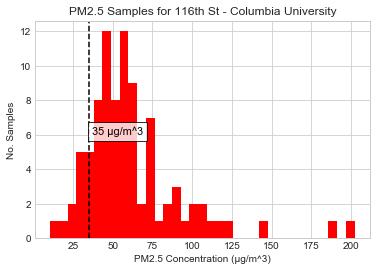

In [44]:
fig, ax = plt.subplots()

ax.hist(dfsub['PM2.5_calib'].loc[dfsub['Location']=="116th St - Columbia University"],color = 'red',bins = 35)
ax.axvline(35, color = 'black', linestyle = 'dashed')
ax.text(37,6,"35 µg/m^3",bbox=dict(facecolor='white', alpha=0.8),**dict(size=11,color='black'))
# ax.set_xlim(right = 400)
ax.set(title = 'PM2.5 Samples for 116th St - Columbia University', 
       xlabel= 'PM2.5 Concentration (µg/m^3)',ylabel = 'No. Samples')

In [13]:
# And then same for train lines
# MAKE THIS ONE INTO A FUNCTION THAT PRODUCES LISTS FOR SPECIFIC LOC_CODES
# MAYBE THREE LAMBDAS, ACTUALLY. EASIER TO PLUG INTO THE GRAPHS EFFICIENTLY

trains = np.sort(dfsub['Train_Line'].loc[dfsub['Loc_code'].isin(['T'])].unique())


train_means = {}
for s in trains:
    train_means[s] = np.mean(dfsub['PM2.5_calib'].loc[dfsub['Train_Line'] == s])

train_std = {}
for t in trains:
    train_std[t] = np.std(dfsub['PM2.5_calib'].loc[dfsub['Train_Line'] == t])
    
dfsub['Train_Line'].loc[dfsub['Loc_code'].isin(['T'])].value_counts()

1      89
A      43
SIR    29
C      25
3      13
L      12
D      12
F      10
2       9
Q       8
W       7
B       6
7       4
E       3
Name: Train_Line, dtype: int64

<ErrorbarContainer object of 3 artists>

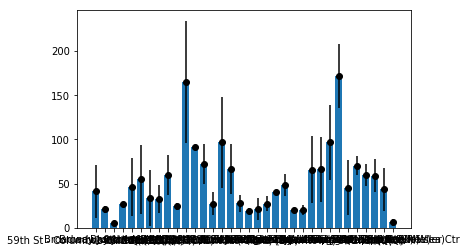

In [16]:
fig,ax = plt.subplots()
ax.bar(*zip(*station_means.items()))
ax.errorbar(*zip(*station_means.items()),list(station_std.values()),fmt = "o", color = 'black')

[Text(0,0.5,'Mean PM2.5 Concentration (µg/m^3)'),
 Text(0.5,0,'Train Line'),
 Text(0.5,1,'Air Quality Between Train Lines (Means & Standard Deviation)')]

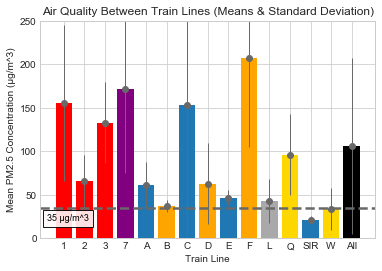

In [23]:
fig,ax = plt.subplots()

train_means['All'] = np.mean(dfsub['PM2.5_calib'].loc[dfsub['Loc_code'] == 'T'])
train_std['All'] = np.std(dfsub['PM2.5_calib'].loc[dfsub['Loc_code'] == 'T'])
colors = ['red','red','red','purple','tab:blue','orange','tab:blue','orange',
          'tab:blue','orange','darkgrey','gold','tab:blue','gold','black']

ax.bar(*zip(*train_means.items()),color = colors)
ax.errorbar(*zip(*train_means.items()),list(train_std.values()),fmt = "o",linewidth = 1, color = 'dimgrey')
# ax.axhline(12, linewidth = 2.5, linestyle = 'dashed',color = 'dimgrey')
ax.axhline(35, linewidth = 2.5, linestyle = 'dashed',color = 'dimgrey')


# ax.text(0-0.8,22,"12 µg/m^3",bbox=dict(facecolor='snow', alpha=0.9),**dict(size=9,color='black'))
ax.text(0-0.8,20,"35 µg/m^3",bbox=dict(facecolor='snow', alpha=0.9),**dict(size=9,color='black'))

# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax.set_ylim(bottom = 0, top = 250)
ax.set(title = "Air Quality Between Train Lines (Means & Standard Deviation)",
      xlabel = "Train Line", ylabel = "Mean PM2.5 Concentration (µg/m^3)")

#Look into fitting a gamma distribution as opposed to bar graph:
# compare maxima as a way of allowing for outliers without breaking the analysis
# Alternative way of presenting this info (quantitatively!), helps avoid stuff like that C-train mean being clearly heavily
# affected

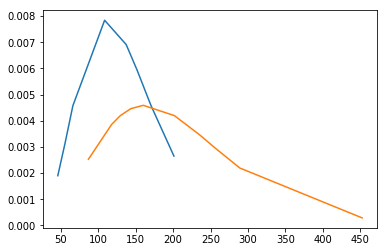

In [38]:
# Lessee if I can figure out these goddamn gamma functions
fig,ax = plt.subplots()

def gams(line):
    x = np.sort(dfsub['PM2.5_calib'].loc[dfsub['Train_Line']==line])
    shape, loc, scale = scipy.stats.gamma.fit(x,floc = 0)
    y = scipy.stats.gamma.pdf(x, shape, loc, scale)
    ax.plot(x,y)

gams('3');gams('F')
# ax.hist(dfsub['PM2.5_calib'].loc[dfsub['Train_Line']=='C'],bins = 40, normed = True)

[Text(0,0.5,'No. Samples'),
 Text(0.5,0,'PM2.5 Concentration (µg/m^3)'),
 Text(0.5,1,'PM2.5 Samples for All Platforms and Trains')]

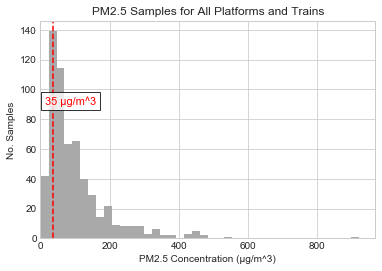

In [24]:
#histogram
#guess something like frequency chart for underground
#right I remember now, ben wanted views on Event characterization
#like spikes in bad air matter more to asthma episodes etc than undercurrent.


#Basic code to get a histogram: will want variants based on Loc_code, and Train_Line. No reason not to
# generate a new one by modifying, rather than laying them all out.
tc = dfsub['PM2.5_calib'].loc[dfsub['Train_Line']=='C']
tf = dfsub['PM2.5_calib'].loc[dfsub['Train_Line']=='F']
t1 = dfsub['PM2.5_calib'].loc[dfsub['Train_Line']=='1']
      
fig, ax = plt.subplots()
ax.hist(dfsub['PM2.5_calib'].loc[dfsub['Loc_code'].isin(['PU','T','PA'])],color = 'darkgray',bins = 40)
ax.axvline(35, color = 'red', linestyle = 'dashed')
# ax.set_xticklabels([])
# ax.set_yticklabels([])

ax.text(14,90,"35 µg/m^3",bbox=dict(facecolor='white', alpha=0.8),**dict(size=11,color='red'))
ax.set_xlim(left = 0)
ax.set(title = 'PM2.5 Samples for All Platforms and Trains', 
       xlabel= 'PM2.5 Concentration (µg/m^3)',ylabel = 'No. Samples')
#k, probably gonna need a lot more data, only 20 points so far with just dfnp and dfsub


In [ ]:
# Comparisons of Temtop & Nephelometer to PA
# ... actually I might want to check whether I want to do the raw vs. calibrated graphs the same way with these.